In [27]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import LabelEncoder
from umap import UMAP

Загрузка данных

In [28]:
data = pandas.read_csv('data/Heart Attack Data Set.csv')

Пропущенные значения

In [29]:
data.isnull().sum()

age                     0
sex                     0
chestPain               0
restingBloodPressure    0
cholesterol             0
highBloodSugar          0
restECG                 0
heartRate               0
induceAngina            0
oldPeak                 0
slope                   0
coloredVessels          0
absorbTallium           0
target                  0
dtype: int64

Преобразование категориальных признаков. В данном наборе данных все признаки уже числовые

Вывод матрицы корреляции

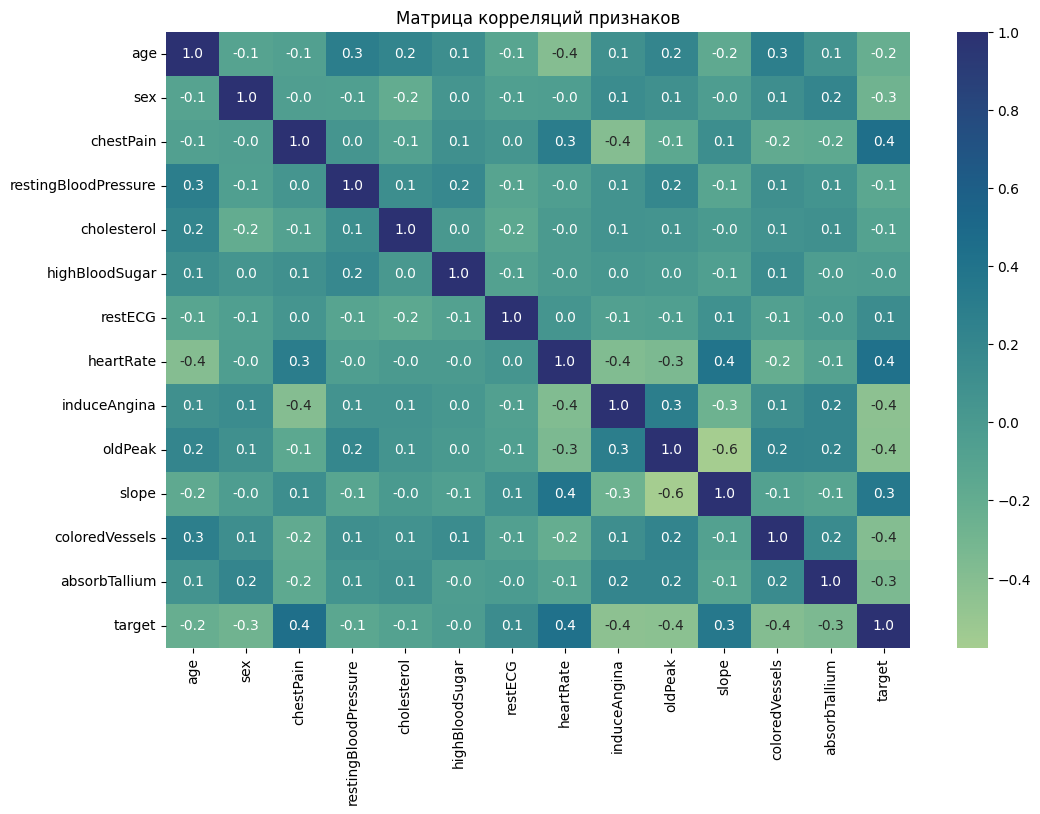

In [30]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(data.corr(), annot=True, cmap='crest', fmt=".1f")
plt.title('Матрица корреляций признаков')
plt.show()

Парные отношения признаков

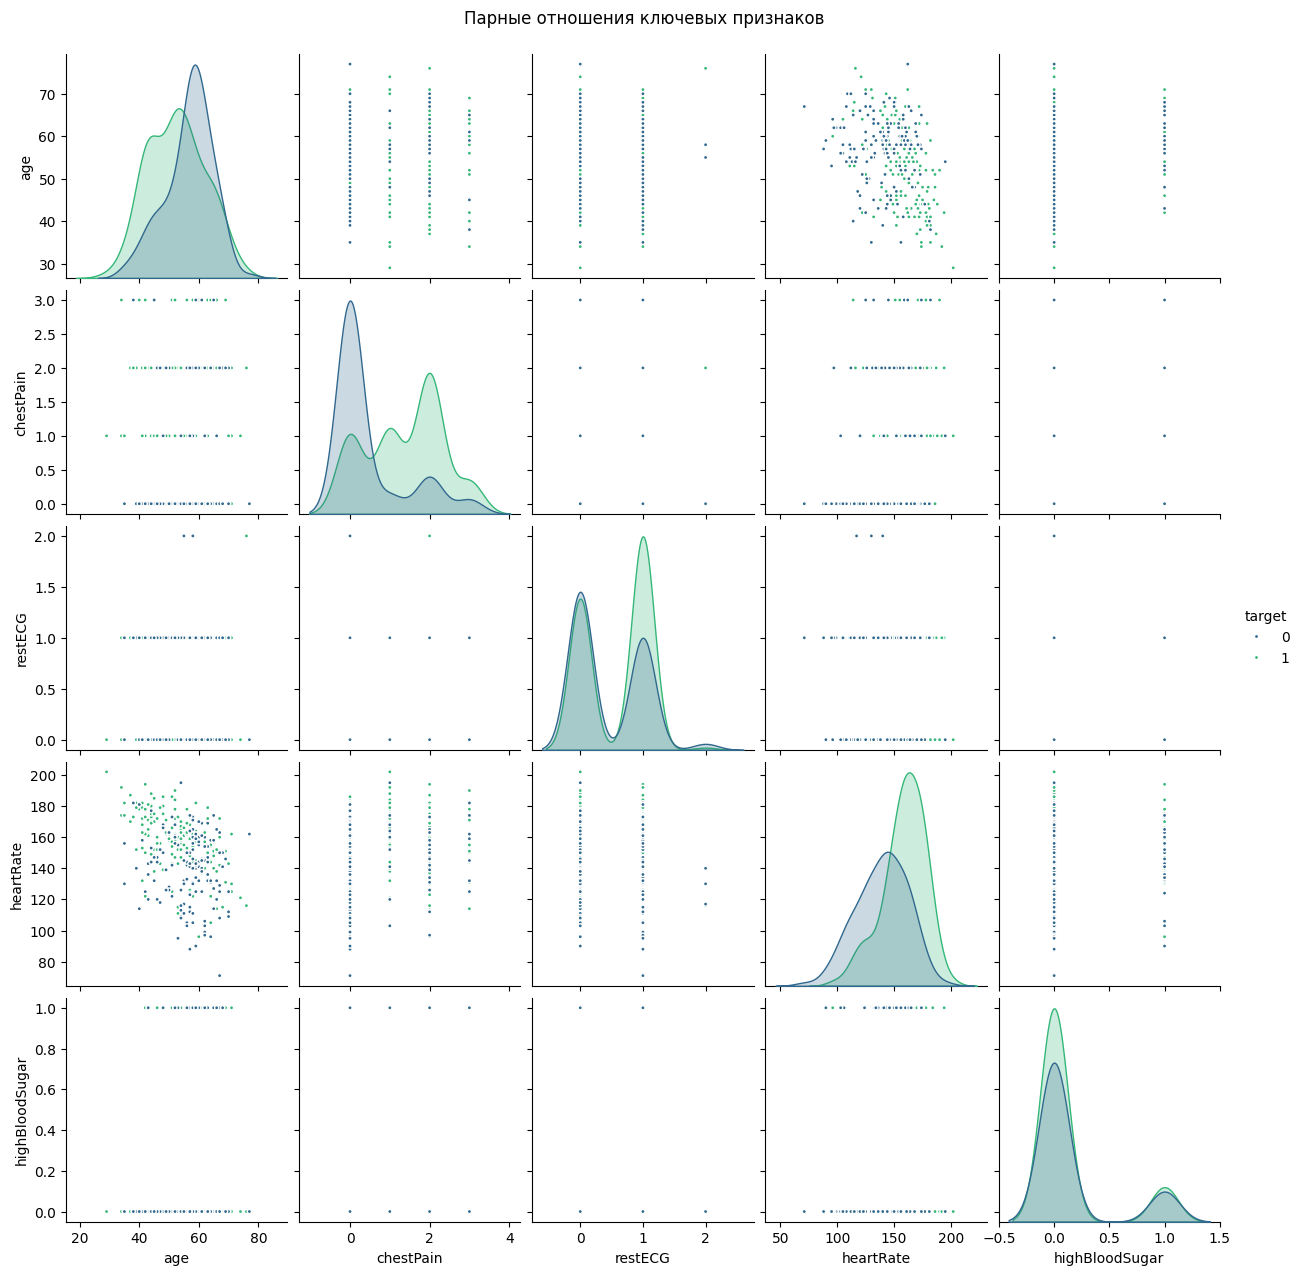

In [52]:
key_features = ['age', 'chestPain', 'restECG', 'heartRate', 'highBloodSugar', 'target']
seaborn.pairplot(data[key_features], hue='target', palette='viridis', plot_kws=dict(marker=".", linewidth=1))
plt.suptitle('Парные отношения ключевых признаков', y=1.02)
plt.show()

Масштабирование данных

In [39]:
x_scaled = StandardScaler().fit_transform(data.drop('target', axis=1))
y = data['target']

Графики методами

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


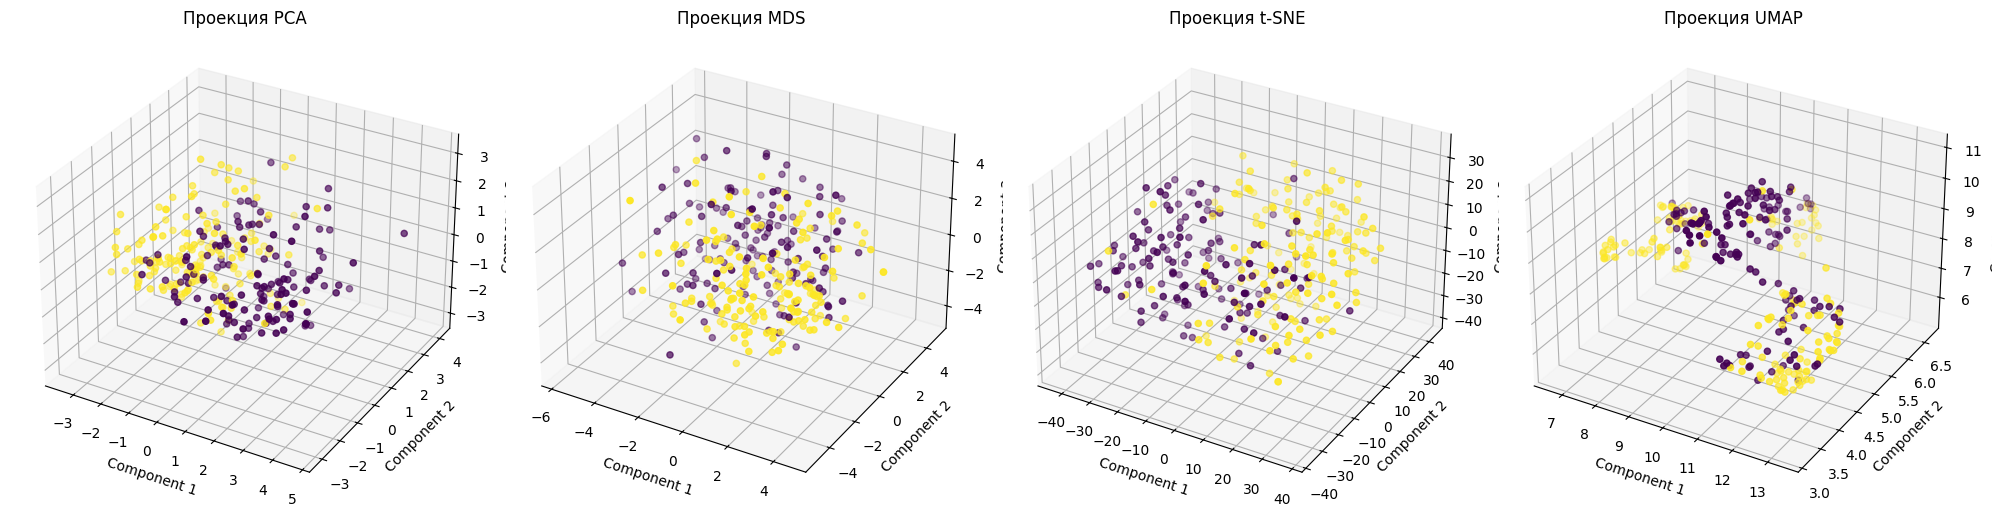

In [50]:
methods = {
    'PCA': PCA(n_components=3),
    'MDS': MDS(n_components=3, random_state=0),
    't-SNE': TSNE(n_components=3, random_state=0),
    'UMAP': UMAP(n_components=3, random_state=0)
}

fig = plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(methods.items(), 1):
    reduced_data = model.fit_transform(x_scaled)
    
    sp = fig.add_subplot(1, 4, i, projection='3d')
    #seaborn.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], 
                    #hue=y, palette='viridis', alpha=0.8)
    #sp.title(f'{name} проекция')
    sp.scatter(xs=reduced_data[:,0], ys=reduced_data[:,1], zs=reduced_data[:,2], zdir='z', c=y)
    sp.set_title(f'Проекция {name}')
    sp.set_xlabel('Component 1')
    sp.set_ylabel('Component 2')
    sp.set_zlabel('Component 3')

plt.tight_layout()
plt.show()

Анализ важности признаков через PCA

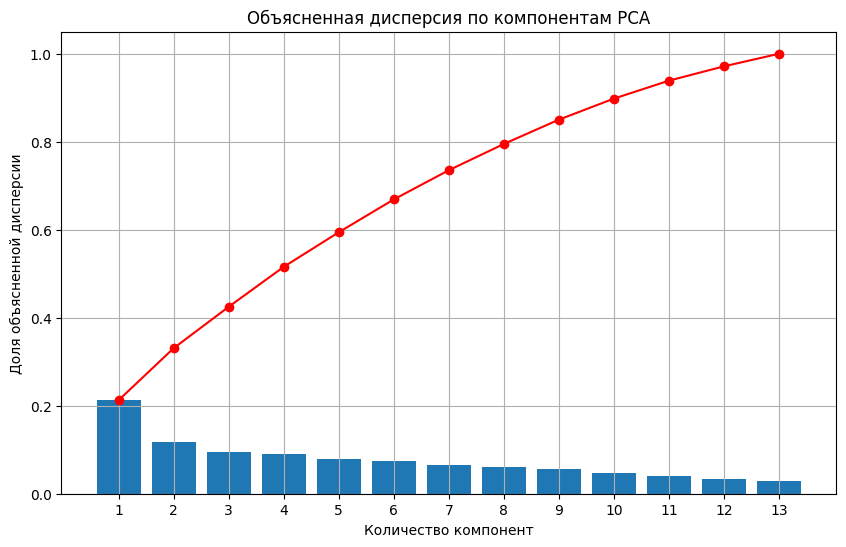

In [33]:
pca = PCA().fit(x_scaled)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), 
        pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         numpy.cumsum(pca.explained_variance_ratio_), 
         'r-', marker='o')
plt.title('Объясненная дисперсия по компонентам PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
plt.show()